# Distillation Bench: Lesson 2

This experiment consists of 3 main parts. We will:
    - Increase to the maximum temperature with a multiplier of 6
    - Increase to the maximum temperature with a multiplier of 7
    - Decrease to the minimum temperature with a multiplier of 3
    
We will see how these actions play out in the distillation bench environment and gain more intuition into how the distillation bench works.

Please read `lesson_2_distillation.md`alongside this notebook in order to have a more thoroughly explained summary behind the code.

First let's start by importing all the required modules.

In [1]:
# import all the required external modules
import gym
import numpy as np
import os
import pickle
import sys
from time import sleep
from gym import envs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# ensure all necessary modules can be found
sys.path.append("../") # to access chemistrylab
sys.path.append("../chemistrylab/reactions") # to access all reactions

In [3]:
# import all local modules
import chemistrylab

In [4]:
# show all environments for distillation bench
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'Distillation' in env_spec.id]
print(env_ids)

['Distillation-v0']


You'll notice that the setup is the same as in lesson 1. Nothing changes for the initialization in this project. The main difference is in the loop later.

In [5]:
# allows user to pick which environment they want to use
# initializes environment
select_env = int(input(f"Enter a number to choose which environment you want to run (0 - {len(env_ids) - 1}): \n"))
env = gym.make(env_ids[select_env])
render_mode = "human"

Enter a number to choose which environment you want to run (0 - 0): 
0


In [6]:
done = False
__ = env.reset()
print('\n')

In [7]:
# shows # of actions available
# for distillation bench there are two elements
# action[0] is a number indicating the event to take place
# action[1] is a number representing a multiplier for the event
# Actions and multipliers include:
#   0: Add/Remove Heat (Heat Value multiplier, relative of maximal heat change)
#   1: Pour BV into B1 (Volume multiplier, relative to max_vessel_volume)
#   2: Pour B1 into B2 (Volume multiplier, relative to max_vessel_volume)
#   3: Pour B1 into BV (Volume multiplier, relative to max_vessel_volume)
#   4: Pour B2 into BV (Volume multiplier, relative to max_vessel_volume)
#   5: Done (Value doesn't matter)
print('# of actions available: ',env.action_space.shape[0])
num_actions_available = env.action_space.shape[0]

# of actions available:  2


In [8]:
total_steps=0
total_reward=0

Here we see that there are 3 main actions, where 2 are commented out. Based on which part of the lesson you're on, please uncomment the needed action.

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_eve

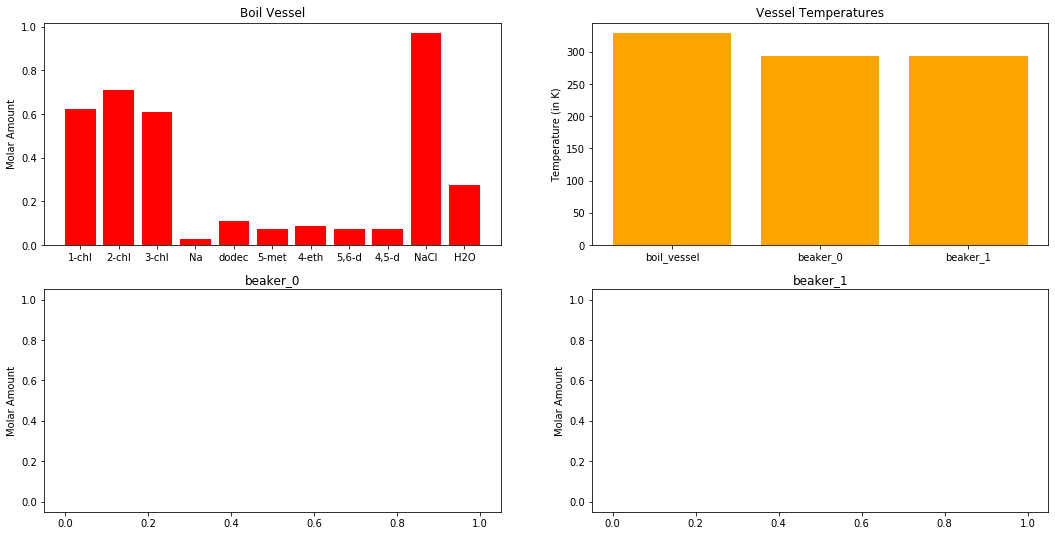

0.19999999999999996
328.8186814754341
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: updat

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_eve

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6363736295087098
-------boil_vessel: mix (feedback_eve

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009840098400984008 mol of H2O
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009840098400984008 mol of H2O
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6582002614450081
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6582002614450081
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.6582002614450081
-------boil_vessel: mix (feedback_eve

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohe

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joul

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009128251939753536 mol of 2-chlorohe

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.012139605462822457 mol of 3-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.012139605462822457 mol of 3-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joul

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.012139605462822457 mol of 3-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.012139605462822457 mol of 3-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joul

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.1043369344354763
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.1043369344354763
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.5688519149368858 Kelvin
Boiling Off 0.0045317083368840

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009345794392523364 mol of 1-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009345794392523364 mol of 1-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009345794392523364 mol of 1-chlorohe

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009345794392523364 mol of 1-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009345794392523364 mol of 1-chlorohexane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joul

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.6207854495889158
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.6207854495889158
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.6207854495889158
-------boil_vessel: mix (feedback_eve

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.6207854495889158
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 1.6207854495889158
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.3494073209130306 Kelvin
Boiling Off 0.007555222644531326 mol of 4,5-diethyloctane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: upd

0.19999999999999996
476.3
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009631591620515289 mol of 4-ethyl-5-methylnonane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.006753956561248107 mol of 4-ethyl-5-methylnonane
Raising Boil Vessel Temperature by 0.7504160068442417
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 3

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009631591620515289 mol of dodecane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.009631591620515289 mol of dodecane
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.005384663751639093 mol of dodecane
Raising Boil 

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.12565976260537
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.12565976260537
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.12565976260537
-------boil_vessel: mix (feedback_event)---

-----------------------------------------
total_steps:  10
reward: 0.00 
total reward: 0.00
[0 6]
Temperature of boiling vessel: 1029.4   K 

0.19999999999999996
1029.376450694521
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.12565976260537
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.12565976260537
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 8.263197482650806
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_eve

0.19999999999999996
1738.0
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.00

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

0.19999999999999996
1738.0
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.00

-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mi

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

0.19999999999999996
1738.0
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.00

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

0.19999999999999996
1738.0
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.00

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

0.19999999999999996
1738.0
hello:  100000.0
hi:  50
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.00

-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Vessel Temperature by 0.0 Kelvin
Boiling Off 0.0017414018284719196 mol of NaCl
-------boil_vessel: mix (feedback_event)-------
-------boil_vessel: update_layer (feedback_event)-------
-------beaker_1: mix (feedback_event)-------
-------beaker_1: update_layer (feedback_event)-------
-------boil_vessel: change_heat (event)-------
Implement Heat Change of 399.99999999999994 joules
Raising Boil Ve

In [9]:
while not done:

    # ACTION 1
    # increase temperature all the way up
    action = np.array([0,6])

    # ACTION 2
    # results in temperature being too high and all material is boiled off in the vessel
    # action = np.array([0,7])

    # ACTION 3
    # decrease temperature all the way down
    # action = np.array([0,3])



    # perform the action and update the reward
    state, reward, done, __ = env.step(action)
    print('-----------------------------------------')
    print('total_steps: ', total_steps)
    print('reward: %.2f ' % reward)
    total_reward += reward
    print('total reward: %.2f' % total_reward)
    print(action)
    print('Temperature of boiling vessel: %.1f ' % env.boil_vessel.temperature, ' K \n')
    # print(state)

    # render the plot
    env.render(mode=render_mode)
    # sleep(1)

    multiplier = 2 * (6 / 10 - 0.5)
    print(multiplier * 1)
    print(env.boil_vessel.temperature)

    print('hello: ', env.distillation.dQ)
    print('hi: ', env.distillation.n_increments)


    #increment one step
    total_steps += 1